<a href="https://colab.research.google.com/github/Eran707/MSc-Computational-Neuroscience-Repo/blob/master/Multicompartment_Sim_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Multicompartment Simulator**

**Eran Frank Shorer**

**MSc Computational Neuroscience**

**"Investigating the effects of impermeant anions on the electrical and computational properties of neurons"**




## Instructions:

This jupyter notebook consists of cells. Some cells are plain text, while others are code. 

Press Shift-Enter simultaneously, or click the cell and press the play button in the main toolbar above to run the cell. 

The output of the cell should be displayed below the cell. 



## **Import classes and modules** 


In [1]:
import pandas as pd

try:
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import bqplot as bqp
    from bqplot import pyplot as plt # bqplot is a plotting for jupyter
    import matplotlib.pyplot as mplt
    import common
    import constants
    import compartment
    import electrodiffusion
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
  
    
    
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
        print("All relevant classes imported")
    





All relevant classes imported


## **Set simulation parameters**


## *A) Compartment parameters*

### A1) Set compartment parameters:

In [2]:
### WIDGET INITIALIZATION ################################################################################
txt_name = widgets.Text(value="Comp1")
lbl_name = widgets.Label(value ="Compartment Name: ")
name_box = widgets.HBox(children = [lbl_name,txt_name])


lbl_rad = widgets.Label(value = "Compartment Radius (um): ")
sldr_rad = widgets.FloatSlider(value=5, min=1, max=11.0, step=0.5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
rad_box = widgets.HBox(children = [lbl_rad,sldr_rad])

lbl_len = widgets.Label(value = "Compartment Length (um): ")
sldr_len = widgets.FloatSlider(value=25, min=0, max=200, step=20, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
len_box = widgets.HBox(children = [lbl_len,sldr_len])

lbl_nai = widgets.Label(value = "Na+ concentration (mM): ")
sldr_nai = widgets.FloatSlider(value=14, min=0, max=100, step=10, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_nai = widgets.HBox(children = [lbl_nai,sldr_nai])

lbl_ki = widgets.Label(value = "K+ concentration (mM): ")
sldr_ki = widgets.FloatSlider(value=122, min=0, max=250, step=5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_ki = widgets.HBox(children = [lbl_ki,sldr_ki])

lbl_cli = widgets.Label(value = "Cl- concentration (mM): ")
sldr_cli = widgets.FloatSlider(value=5, min=0, max=50, step=5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_cli = widgets.HBox(children = [lbl_cli,sldr_cli])

lbl_xi = widgets.Label(value = "Impermeant anion concentration (mM): ")
sldr_xi = widgets.FloatSlider(value=150, min=0, max=300, step=10, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_xi = widgets.HBox(children = [lbl_xi,sldr_xi])

lbl_zi = widgets.Label(value = "Impermeant anion average charge: ")
sldr_zi = widgets.FloatSlider(value=-0.85, min=-3, max=0, step=0.05, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_zi = widgets.HBox(children = [lbl_zi,sldr_zi])

########################################################################################################


global name, comp_arr, df_sim


#CREATION OF THE PANDAS DATA FRAME THAT WILL KEEP TRACK OF ALL THE VARIABLES IN REAL TIME
df_sim = pd.DataFrame()

comp_arr =[]

output1 = widgets.Output()


btn_new_comp = widgets.Button(description = "Create Compartment",button_style ="success")
btn_defaults = widgets.Button(description = "Reset to defaults")
hbox_btns = widgets.HBox(children = [btn_new_comp, btn_defaults])



def new_comp_clicked(b):
    
    name = txt_name.value
    for j in range (len(comp_arr)):
        if name == comp_arr[j].name:
            txt_name.color = 'red'
            raise Exception("Two compartments cannot have the same name")
    new_comp = compartment.Compartment(name,radius=sldr_rad.value*1e-5, length=sldr_len.value*1e-5,p=1)
    new_comp.set_ion_properties(na_i=sldr_nai.value*1e-3, k_i = sldr_ki.value*1e-3, cl_i=sldr_cli.value*1e-3,x_i=sldr_xi.value*1e-3, z_i=sldr_zi.value)
    comp_arr.append(new_comp)
    arr_df = new_comp.get_df_array()
    df_sim[name] = arr_df
    df_sim.index = ['Radius', 'Length', 'Volume', 'Na_i', 'K_i', 'Cl_i', 'X_i', 'z_i', 'ATPase pump rate','KCC2 pump rate','Vm', 'Ek', 'ECl']
    with output1:
        print("Compartment: ("+ new_comp.name +") created" )
        print(new_comp.get_df_array())
      
btn_new_comp.on_click(new_comp_clicked)

def btn_defaults_clicked(b):
    
    
    sldr_rad.value=5
    sldr_len.value = 25
    sldr_nai.value= 14
    sldr_ki.value = 122
    sldr_cli.value = 5
    sldr_xi.value = 150
    sldr_zi.value = -0.85
    
btn_defaults.on_click(btn_defaults_clicked)


vbox_grand = widgets.VBox(children = [name_box,rad_box,len_box, hbox_nai,hbox_ki,hbox_cli,hbox_xi,hbox_zi,hbox_btns], layout=Layout(border ="solid"))

display(output1,vbox_grand)







Output()

### A2) Review & edit compartments

In [3]:
btn_review = widgets.Button(description = "Review compartments", button_style ="success")
output2 = widgets.Output()
display(btn_review,output2)



def btn_review_clicked(b):
    output2.clear_output()
    with output2:
        display(df_sim)

btn_review.on_click(btn_review_clicked)       




btn_edit = widgets.Button(description = "Edit compartments", button_style ="success")
output3 = widgets.Output()
display(btn_edit,output3)

btn_save_edit = widgets.Button(description = "Save change", button_style ="success",visible='false')


def btn_edit_clicked(b):
    
    output3.clear_output()
    opts_comp =[]
    for i in range(len(comp_arr)):
        opts_comp.append(comp_arr[i].name)

    global drp_comp,drp_param,txt_new_val
    drp_comp=widgets.Dropdown(options=opts_comp,description='Compartment:',visible='false')
    opts_param=df_sim.index.array[0:10]
    drp_param=widgets.Dropdown(options=opts_param, description='Parameter:', visible='false')

    txt_new_val=widgets.Text(value='', description='New value:', visible='false')
     

    
    drp_param.visible ="true"
    drp_comp.visible ="true"
    txt_new_val.visible="true"
    btn_save_edit.visible ='true'
    
    with output3:
        display(drp_comp,drp_param,txt_new_val,btn_save_edit)
  




btn_edit.on_click(btn_edit_clicked)




def btn_save_edit_clicked(b):
    comp = drp_comp.value
    param = drp_param.value
    change = txt_new_val.value
    
    df_sim.loc[param,comp] = change
    output2.clear_output()
    output3.clear_output()
    with output3:
        display(df_sim)

btn_save_edit.on_click(btn_save_edit_clicked)  



Button(button_style='success', description='Review compartments', style=ButtonStyle())

Output()

Button(button_style='success', description='Edit compartments', style=ButtonStyle())

Output()

### A3) Multicompartment visualization


In [4]:
btn_visualize = widgets.Button(description = "Visualize compartments",button_style ="success")

output4 = widgets.Output()
display(btn_visualize,output4)






def btn_visualize_clicked(b):
    
    
    output4.clear_output(
    ) 
   
    for i in range(df_sim.shape[1]):
        
        hgt = str(df_sim.loc['Length',comp_arr[i].name] *80000)+"px"
        wdth = str(df_sim.loc['Radius',comp_arr[i].name]*5000000)+"px"
        btn = widgets.Button(layout=Layout(height = hgt, width =wdth,border="solid"), disabled =True,description =comp_arr[i].name)
        btn.style.button_color = 'brown'
        with output4:
            display(btn)
        

            

btn_visualize.on_click(btn_visualize_clicked)






Button(button_style='success', description='Visualize compartments', style=ButtonStyle())

Output()

## *B) Timing*

In [5]:
global total_t,dt,t_arr

### TOTAL TIME
lbl_total_t = widgets.Label(value="Set the simulation run time (minutes):")

sldr_total_t = widgets.FloatSlider(value=1, min=0.5, max=30, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',
    readout=True, readout_format='.1f')
HBox_total_t = widgets.HBox(children = [lbl_total_t,sldr_total_t])


### TIME STEP
lbl_dt = widgets.Label(value="Set the simulation time step (milliseconds):")
sldr_dt = widgets.FloatSlider(value=1, min=1, max=5, step=0.2, disabled=False, continuous_update=False, orientation='horizontal',
    readout=True, readout_format='.1f')
HBox_dt = widgets.HBox(children = [lbl_dt,sldr_dt])

    
t_arr = [0]


vbox_t = widgets.VBox([HBox_total_t,HBox_dt], layout=Layout(border='solid'))



display(vbox_t)


#print("Set total simulation time (minutes):")

#print("Set time step (milliseconds):")



## *C) Run Simulation*

In [6]:

btn_sim = widgets.Button(description ="Run Simulation", button_style="Danger",disabled=False)
output5 = widgets.Output()
output6 = widgets.Output()
output7 = widgets.Output()
display(output6, output7, btn_sim)

global SIM_OVER
SIM_OVER = False

def btn_sim_clicked(b):
  
    
    ###ESTABLISHING ELECTRODIFFUSION LINK
    
    global ed_arr
    ed_arr = [] # array of all the electro-diffusion links between the compartments
    ed_dict_arr = [] # array of all the electro-diffusion dictionaries (constantly changing)
    ed_conc_changes_arr = []
    for e in range(len(comp_arr)-1):
        ed_arr.append(electrodiffusion.Electrodiffusion(comp_arr[e],comp_arr[e+1]))
    with output5:
        print("All compartments successfully linked")
    
    ##########
    
    
    
    
    global dt,total_t
    dt=sldr_dt.value*1e-3
    total_t= sldr_total_t.value *60
    interval = total_t/dt
    run_t=0
  
    prg = widgets.FloatProgress(description='Simulating...', min=0,step=dt,max=total_t,value=0,continuous_update=True)
    with output6:
        display(prg)
    
    ED_ON = True
    

    while run_t < total_t:

        
        if ED_ON:

            ed_dict_arr = []  # array of all the electro-diffusion dictionaries (constantly changing)
            ed_conc_changes_arr = []


            for a in range(len(comp_arr)):
                comp_arr[a].step(dt)  # step for each compartment
                ed_dict_arr.append(comp_arr[a].get_ed_dict())  # electrodiffusion dictionary for each compartment

            for b in range(len(comp_arr) - 1):
                ed_conc_changes_arr.append(
                    ed_arr[b].calc_ed(dt, ed_dict_arr[b], ed_dict_arr[b + 1]))  # makes an array of all the ED conc changes

            for c in range(len(comp_arr) - 1):
                comp_arr[c].ed_update(ed_conc_changes_arr[c],
                                      "positive")  # appending the electrodiffusion concentrations for each compartment
                comp_arr[c + 1].ed_update(ed_conc_changes_arr[c], "negative")

            for d in range(len(comp_arr)):
                comp_arr[d].update_volumes()  # updates of the volumes, arrays, and dataframe for each compartment
                if run_t != 0:
                    comp_arr[d].update_arrays()
                df_sim[comp_arr[d].name] = comp_arr[d].get_df_array()
            
            if run_t != 0:
                t_arr.append(run_t)
                
            run_t += dt
            prg.value += dt  

        else: # if you want to run with normal diffusion not ED
            for a in range(len(comp_arr)):
                comp_arr[a].step(dt)
                comp_arr[a].update_volumes()  # updates of the volumes, arrays, and dataframe for each compartment
                comp_arr[a].update_arrays()
                df_sim[comp_arr[a].name] = comp_arr[d].get_df_array()
    
       
    SIM_OVER = True
    btn_sim.disabled=True
    lbl_finalvals = widgets.Label(value="Final Values:")
    with output7:  
        print("Simulation complete!")
        display(lbl_finalvals,df_sim)
        
        




        
btn_sim.on_click(btn_sim_clicked)  



Output()

Output()

Button(button_style='danger', description='Run Simulation', style=ButtonStyle())

## 4) Graphing


In [7]:
display(df_sim)
SIM_OVER == True ## * Just for testing purposes

#graphing module can onlt be accessed once the simulation is complete

    ##### User interface:
    
drp_comp = widgets.Dropdown(description='Compartment:')

options_drp_comp = []
options_drp_comp.append('ALL COMPARTMENTS')
for i in range(len(comp_arr)):
    options_drp_comp.append(comp_arr[i].name)

drp_comp.options = options_drp_comp    



drp_param = widgets.Dropdown(description='Parameter:')
options_drp_param = ['Membrane Potential (Vm)','Cl- Reversal Potential (E-Cl)', 'K+ Reversal Potential (E-K)',''
                        ,'Volume (pL)','',
                         'All ion concentrations','Na+ Conc.','K+ Conc.','Cl- Conc.','Impermeant anion Conc.']


drp_param.options = options_drp_param

intervals = len(t_arr) #amount of time points simulated

sldr_start = widgets.FloatSlider(description='Start time (s)',min=0,step=dt,max=total_t, value=20)
sldr_bins = widgets.FloatSlider(description='Bins',min=50,step=50,max=intervals, value=1000)




hbox_graph = widgets.HBox()
vbox_graph1 = widgets.VBox()
vbox_graph2 = widgets.VBox()
vbox_graph1.children =[drp_comp,drp_param]
vbox_graph2.children =[sldr_start,sldr_bins]
hbox_graph.children = [vbox_graph1,vbox_graph2]

btn_main_graph = widgets.Button(description='Graph it!',button_style='success')
output10 = widgets.Output()
display(hbox_graph,btn_main_graph,output10)

number_of_colors = len(comp_arr)

color_arr = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

def plot_main_graph(param='',comp_num=0,all_comps =False,jump=1):
    
        
        
        
       
        
        
        start_t = int(sldr_start.value * 1000)
        x_arr = t_arr 
    
        bins = sldr_bins.value #bins required
        jump = round(intervals/bins)
        
        x_sc = bqp.LinearScale()
        y_sc = bqp.LinearScale()
        col_sc = bqp.ColorScale(scheme="RdYlGn")
        ax_x = bqp.Axis(scale = x_sc, label="Time(s)", min= start_t, max=t_arr[-1])
        ax_y = bqp.Axis(scale = y_sc, label=param, orientation='vertical', side='left')
        
        
        
        if all_comps == True:
                      
            m_arr = []
            output10.clear_output()
                   
         
            
            for i in range(len(comp_arr)):
                
                col = color_arr[i]
                
                f1_title = "All Compartments"+" : " + "Time (s) vs " + drp_param.value 
                
                if param == 'Membrane Potential (Vm)':
                    m_arr.append(bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[i].v_arr[start_t:-1:jump],colors = [col], 
                       display_legend=True,labels= ['Vm - '+comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
                elif param == 'Cl- Reversal Potential (E-Cl)':
                    m_arr.append(bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[i].E_cl_arr[start_t:-1:jump], colors = [col],  
                       display_legend=True,labels= ['E-Cl - '+comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
                elif param == 'K+ Reversal Potential (E-K)':
                    m_arr.append(bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[i].E_k_arr[start_t:-1:jump], colors = [col],  
                       display_legend=True,labels= ['E-K - '+comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
                elif param == 'Volume (pL)':
                    m_arr.append(bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[i].w_arr[start_t:-1:jump], colors = [col],  
                       display_legend=True,labels= ['Vol. - '+comp_arr[i].name ], scales = {'x': x_sc, "y": y_sc}))
                    
                elif param == 'Na+ Conc.':
                    m_arr.append(bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[i].na_arr[start_t:-1:jump], colors = [col],  
                       display_legend=True,labels= ['Na+ - '+comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
                elif param == 'K+ Conc.':
                    m_arr.append(bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[i].k_arr[start_t:-1:jump],colors = [col],  
                       display_legend=True,labels= ['K+ - '+comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
                elif param == 'Cl- Conc.':
                    m_arr.append(bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[i].cl_arr[start_t:-1:jump],colors = [col],  
                       display_legend=True,labels= ['Cl- - '+comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
                elif param == 'Impermeant anion Conc.':
                    m_arr.append(bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[i].x_arr[start_t:-1:jump], colors = [col], 
                       display_legend=True,labels= ['X -'+comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))        
            
                
                
                       
                
            f1 = bqp.Figure(title = f1_title, marks=m_arr, axes=[ax_x, ax_y],legend_location='top-right',scales={'x': x_sc, 'color': col_sc, 'y': y_sc})
    
            f1.layout.height = '600px'
            f1.layout.width = '800px'
            output10.clear_output()
            with output10:    
                display(f1)
        
        
        if all_comps == False:            
            
            f1_title = comp_arr[comp_num].name+" : " + "Time (s) vs " + drp_param.value 

            if param == 'Membrane Potential (Vm)':
                
                m1 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].v_arr[start_t:-1:jump],colors = ['#000000'], 
                       display_legend=True,labels= ['Vm'], scales = {'x': x_sc, "y": y_sc})
                
            elif param == 'Cl- Reversal Potential (E-Cl)':
                
                m1 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].E_cl_arr[start_t:-1:jump],colors = ['#000000'], 
                       display_legend=True,labels= ['E-Cl'], scales = {'x': x_sc, "y": y_sc})
                
            elif param == 'K+ Reversal Potential (E-K)':
                
                m1 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].E_k_arr[start_t:-1:jump],colors =['#000000'], 
                       display_legend=True,labels= ['E-K'], scales = {'x': x_sc, "y": y_sc})
                 
            elif param == 'Volume (pL)':
                
                m1 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].w_arr[start_t:-1:jump],colors = ['#000000'], 
                       display_legend=True,labels= ['Vol.'], scales = {'x': x_sc, "y": y_sc})
                
            elif param == 'Na+ Conc.':
                
                m1 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].na_arr[start_t:-1:jump],colors = ['#e7298a'], 
                       display_legend=True,labels= ['Na+'], scales = {'x': x_sc, "y": y_sc})
                
            elif param == 'K+ Conc.':
                
                m1 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].k_arr[start_t:-1:jump],colors = ['#7570b3'], 
                       display_legend=True,labels= ['K+'], scales = {'x': x_sc, "y": y_sc}) 
             
            elif param == 'Cl- Conc.':
                
                m1 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].cl_arr[start_t:-1:jump],colors = ['#1b9e77'], 
                       display_legend=True,labels= ['Cl-'], scales = {'x': x_sc, "y": y_sc}) 
                
            elif param == 'Impermeant anion Conc.':
                
                m1 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].x_arr[start_t:-1:jump],colors = ['#000000'], 
                       display_legend=True,labels= ['X'], scales = {'x': x_sc, "y": y_sc}) 
                
            elif param == 'All ion concentrations':
                
                m1 = []
                
                a1 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].na_arr[start_t:-1:jump],colors = ['#e7298a'], 
                       display_legend=True,labels= ['Na+'], scales = {'x': x_sc, "y": y_sc})
                
                a2 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].k_arr[start_t:-1:jump],colors = ['#7570b3'], 
                       display_legend=True,labels= ['K+'], scales = {'x': x_sc, "y": y_sc}) 
                
                
                a3 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].cl_arr[start_t:-1:jump],colors = ['#1b9e77'], 
                       display_legend=True,labels= ['Cl-'], scales = {'x': x_sc, "y": y_sc})
                
                a4 = bqp.Lines(x= t_arr[start_t:-1:jump],y= comp_arr[comp_num].x_arr[start_t:-1:jump],colors = ['#000000'], 
                       display_legend=True,labels= ['X'], scales = {'x': x_sc, "y": y_sc}) 
                
                m1 = [a1,a2,a3,a4]
                
                
                f1_title = comp_arr[comp_num].name + ": all ion concentrations vs time"
                f1 = bqp.Figure(title = f1_title, marks=m1, axes=[ax_x, ax_y],legend_location='top-right')
                f1.layout.height = '600px'
                f1.layout.width = '800px'
                output10.clear_output()
                with output10:    
                    display(f1)
                return
            
    
    
            f1 = bqp.Figure(title = f1_title, marks=[m1], axes=[ax_x, ax_y],legend_location='top-right')
    
            f1.layout.height = '600px'
            f1.layout.width = '800px'
            output10.clear_output()
            with output10:    
                display(f1)

            
            
        
                
                
            

        #####


def btn_main_graph_clicked(b):
    
    
    start_t = int(sldr_start.value * 1000)
    x_arr = t_arr 
    
    bins = sldr_bins.value #bins required

    jump = round(intervals/bins)
    
    
    
    if drp_comp.value == 'ALL COMPARTMENTS':
    
            param = drp_param.value
            plot_main_graph(param,all_comps=True,jump=jump)

    
    elif drp_comp.value != 'ALL COMPARTMENTS':
        
        
        for i in range(len(comp_arr)):
            if (drp_comp.value == comp_arr[i].name):
                comp_num = i

        param = drp_param.value
        plot_main_graph(param,comp_num,all_comps=False,jump=jump)

    
    
    #if drp_comp != 'ALL COMPARTMENTS':
           
        
btn_main_graph.on_click(btn_main_graph_clicked)

#print(y_arr)

        
        


,Comp1,Comp2
Radius,4.919134e-05,4.990213e-05
Length,2.500000e-04,2.500000e-04
Volume,1.900497e-12,1.955816e-12
Na_i,3.254335e-03,3.253808e-03
K_i,1.336161e-01,1.338875e-01
Cl_i,5.149724e-03,9.146257e-03
X_i,1.549723e-01,1.505890e-01
z_i,-8.500000e-01,-8.500000e-01
ATPase pump rate,1.036427e-04,1.036427e-04
KCC2 pump rate,2.072854e-08,2.072854e-08


Button(button_style='success', description='Graph it!', style=ButtonStyle())

Output()

### 4.2 Boundary dynamics

Boundaries refer to the area between adjacent compartments. //
In non-isopotential neurons there must be a steady state (non-zero) flux of ions between compartments.
Negative values = ions entering the compartment.
Positive values = ions entering compartment

In [33]:
drp_bound = widgets.Dropdown(description="Boundary:")
btn_bound = widgets.Button(description = "Graph Boundary")
sldr_start2 = widgets.FloatSlider(description='Start time (s)',min=0,step=dt,max=total_t, value=20)


hbox_bound = widgets.HBox()
vbox_bound1 = widgets.VBox()
vbox_bound2 = widgets.VBox()
vbox_bound1.children =[drp_bound,btn_bound]
vbox_bound2.children =[sldr_start2]
hbox_bound.children = [vbox_bound1,vbox_bound2]


output_bound_setting = widgets.Output()


hbox_graph1 = widgets.HBox()
hbox_graph2 = widgets.HBox()
output_graph1 = widgets.Output()
output_graph2 = widgets.Output()
output_graph3 = widgets.Output()
output_graph4 = widgets.Output()
vbox_graph = widgets.VBox()
hbox_graph1.children = [output_graph1,output_graph2]
hbox_graph2.children = [output_graph3,output_graph4]
vbox_graph.children = [hbox_graph1, hbox_graph2]

with output_bound_setting:
    display(hbox_bound)

    
bound_list = []

for i in range(len(ed_arr)):
    bound_list.append(ed_arr[i].name)
    
drp_bound.options = bound_list



def btn_bound_clicked(b):
    
    
    for i in range(len(ed_arr)):
        if drp_bound.value == ed_arr[i].name:
            bound_num = i
    
    
    start_t = int(sldr_start2.value * 1000)
    x_arr = t_arr 
    
    
   
    
    
    bound = ed_arr[bound_num].name
    compA = ed_arr[bound_num].comp_a
    compB = ed_arr[bound_num].comp_b
    
    
    
    
    output_graph1.clear_output()
    output_graph2.clear_output()
    output_graph3.clear_output()
    output_graph4.clear_output()
    
    #
    
    ##### Graph 1: compA - ion changes via channels
    
    
    #fig1_A.title = compA.name + " [Ion] changes across membrane"
    #tlbr1A = bqp.Toolbar(fig1_A)
    
    x_sc = bqp.LinearScale()
    y_sc = bqp.LinearScale()
    
    plt1A1 = bqp.Lines(x= t_arr[start_t:-1],y=compA.d_na_arr[start_t:-1],colors = ['#e7298a'], 
                       display_legend=True,labels= ['d-Na'], scales = {'x': x_sc, "y": y_sc})
    plt1A2 = bqp.Lines(x= t_arr[start_t:-1],y=compA.d_k_arr[start_t:-1], colors = ['#7570b3'],
                       display_legend =True, labels = ['d-K'], scales = {'x': x_sc, "y": y_sc})
    plt1A3 = bqp.Lines(x= t_arr[start_t:-1],y=compA.d_cl_arr[start_t:-1], colors = ['#1b9e77'],
                       display_legend = True, labels =['d-Cl'], scales = {'x': x_sc, "y": y_sc})
    ax_x = bqp.Axis(scale = x_sc, label="Time(s)", min= start_t, max=t_arr[-1])
    ax_y = bqp.Axis(scale = y_sc, label="Concentration (mM)", orientation='vertical', side='left')
    
    fig1_A = bqp.Figure(title = compA.name + " [Ion] changes across membrane", 
                        marks=[plt1A1,plt1A2,plt1A3], axes=[ax_x, ax_y],legend_location='bottom-right')
    fig1_A.layout.height = '500px'
    fig1_A.layout.width = '400px'
  
    with output_graph1:    
        display(fig1_A)
        
        
    x_sc = bqp.LinearScale()
    y_sc = bqp.LinearScale()
    
    plt1B1 = bqp.Lines(x= t_arr[start_t:-1],y=compB.d_na_arr[start_t:-1],colors = ['#e7298a'], 
                       display_legend=True,labels= ['d-Na'], scales = {'x': x_sc, "y": y_sc})
    plt1B2 = bqp.Lines(x= t_arr[start_t:-1],y= compB.d_k_arr[start_t:-1], colors = ['#7570b3'],
                       display_legend =True, labels = ['d-K'], scales = {'x': x_sc, "y": y_sc})
    plt1B3 = bqp.Lines(x= t_arr[start_t:-1],y= compB.d_cl_arr[start_t:-1], colors = ['#1b9e77'],
                       display_legend = True, labels =['d-Cl'], scales = {'x': x_sc, "y": y_sc})
    ax_x = bqp.Axis(scale = x_sc, label="Time(s)", min= start_t, max=t_arr[-1])
    ax_y = bqp.Axis(scale = y_sc, label="Concentration (mM)", orientation='vertical', side='left')
    
    fig1_B = bqp.Figure(title = compB.name + " [Ion] changes across membrane", 
                        marks=[plt1B1,plt1B2,plt1B3], axes=[ax_x, ax_y],legend_location='bottom-right')
    fig1_B.layout.height = '500px'
    fig1_B.layout.width = '400px'
  
    with output_graph2:    
        display(fig1_B)    
        
    
    x_sc = bqp.LinearScale()
    y_sc = bqp.LinearScale()
    
    plt2A1 = bqp.Lines(x= t_arr[start_t:-1],y= ed_arr[bound_num].bound_na_arr[start_t:-1],colors = ['#e7298a'], line_style = 'dashed',
                       display_legend=True,labels= ['Na'], scales = {'x': x_sc, "y": y_sc})
    plt2A2 = bqp.Lines(x= t_arr[start_t:-1],y= ed_arr[bound_num].bound_k_arr[start_t:-1], colors = ['#7570b3'], line_style = 'dashed',
                       display_legend =True, labels = ['K'], scales = {'x': x_sc, "y": y_sc})
    plt2A3 = bqp.Lines(x= t_arr[start_t:-1],y= ed_arr[bound_num].bound_cl_arr[start_t:-1], colors = ['#1b9e77'], line_style = 'dashed',
                       display_legend = True, labels =['Cl'], scales = {'x': x_sc, "y": y_sc})
    ax_x = bqp.Axis(scale = x_sc, label="Time(s)", min= start_t, max=t_arr[-1])
    ax_y = bqp.Axis(scale = y_sc, label="Concentration (mM)", orientation='vertical', side='left')
    
    fig2_A = bqp.Figure(title = compA.name + " [Ion] changes across compartment", 
                        marks=[plt2A1,plt2A2,plt2A3], axes=[ax_x, ax_y],legend_location='bottom-right')
    fig2_A.layout.height = '500px'
    fig2_A.layout.width = '400px'
  
    with output_graph3:    
        display(fig2_A)
    
    

    x_sc = bqp.LinearScale()
    y_sc = bqp.LinearScale()
    
    temp_na_arr =[]
    temp_k_arr=[]
    temp_cl_arr=[]
    for i in range(len(ed_arr[bound_num].bound_na_arr)):
        temp_na_arr.append(-1*ed_arr[bound_num].bound_na_arr[i])
        temp_k_arr.append(-1*ed_arr[bound_num].bound_k_arr[i])
        temp_cl_arr.append(-1*ed_arr[bound_num].bound_cl_arr[i])
    
    plt2B1 = bqp.Lines(x= t_arr[start_t:-1],y= temp_na_arr[start_t:-1],colors = ['#e7298a'], line_style = 'dashed',
                       display_legend=True,labels= ['Na'], scales = {'x': x_sc, "y": y_sc})
    plt2B2 = bqp.Lines(x= t_arr[start_t:-1],y= temp_k_arr[start_t:-1], colors = ['#7570b3'], line_style = 'dashed',
                       display_legend =True, labels = ['K'], scales = {'x': x_sc, "y": y_sc})
    plt2B3 = bqp.Lines(x= t_arr[start_t:-1],y= temp_cl_arr[start_t:-1], colors = ['#1b9e77'], line_style = 'dashed',
                       display_legend = True, labels =['Cl'], scales = {'x': x_sc, "y": y_sc})
    ax_x = bqp.Axis(scale = x_sc, label="Time(s)", min= start_t, max=t_arr[-1])
    ax_y = bqp.Axis(scale = y_sc, label="Concentration (mM)", orientation='vertical', side='left')
    
    fig2_B = bqp.Figure(title = compB.name + " [Ion] changes across compartment", 
                        marks=[plt2B1,plt2B2,plt2B3], axes=[ax_x, ax_y],legend_location='bottom-right')
    fig2_B.layout.height = '500px'
    fig2_B.layout.width = '400px'
    
  
    with output_graph4:    
        display(fig2_B)
    

        

btn_bound.on_click(btn_bound_clicked)  
    
    
display(output_bound_setting,vbox_graph)


#print(ed_arr[0].bound_na_arr)

Output()

### Ionic Heatmap

In [8]:
### HEATMAP OF ION CHANGES DURING SIMULATION:

########################
# Widget initialization

btn_heat = widgets.Button(description = 'Show Heat Map')
drp_ion = widgets.Dropdown(description = 'Ion:',options=['Na','K','Cl','X'])
sldr_heat = widgets.IntSlider(description= 'Bins', value= 20, min = 5, max= 100, step=2)
output_heat = widgets.Output()

###########################
# Plotting function on click

def btn_heat_clicked(b):

    y_arr = []
    x_arr = []
    data_arr = []
    bins = sldr_heat.value
    ion = drp_ion.value
    jump = int(total_t*1000/bins)
    
    
    for i in range(len(comp_arr)):
        
        y_arr.append(comp_arr[i].name)
        temp_arr =[]
        
        for j in range(bins):
            time_point = j*jump
            if i==0:
                x_arr.append(round(t_arr[time_point],2))
            if ion == 'Na':
                temp_arr.append(comp_arr[i].na_arr[time_point])
            elif ion == 'K':
                temp_arr.append(comp_arr[i].k_arr[time_point])
            elif ion == 'Cl':
                temp_arr.append(comp_arr[i].cl_arr[time_point])
            elif ion == 'X':
                temp_arr.append(comp_arr[i].x_arr[time_point])
        
        data_arr.append(temp_arr)
                
    
    
    x_sc = bqp.LinearScale()
    y_sc = bqp.LinearScale()
    
    
    
    with output_heat:
        output_heat.clear_output()
        mplt.figure()
        plt_heat = sns.heatmap(data_arr,cmap="BuPu", linewidth=0.5, xticklabels=x_arr, yticklabels=y_arr, cbar_kws={'label': 'Concentration (mM)'})
        mplt.xlabel("Simulation time (s)")
        mplt.ylabel("Compartment")
        mplt.show()
        
    
    #display(output_heat)
    
    
##################################

btn_heat.on_click(btn_heat_clicked)


display(drp_ion, sldr_heat,btn_heat,output_heat)

Dropdown(description='Ion:', options=('Na', 'K', 'Cl', 'X'), value='Na')

IntSlider(value=20, description='Bins', min=5, step=2)

Button(description='Show Heat Map', style=ButtonStyle())

Output()

### Compartment equilibria


Dropdown(description='Compartment', options=('Comp1', 'Comp2'), value='Comp1')

Button(button_style='info', description='View Equilibrium dynamic', style=ButtonStyle())

Output()

Output()

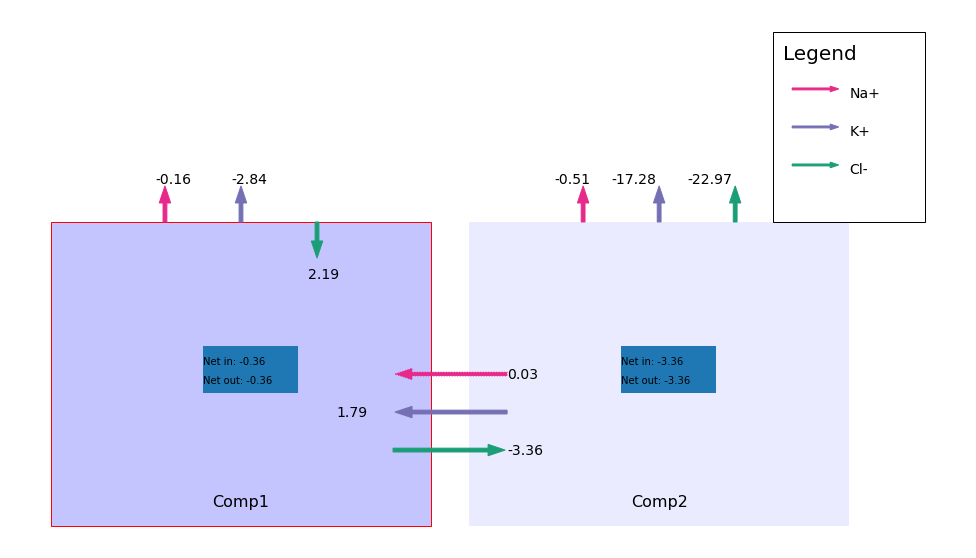

In [9]:
#############################################################################################################
# Widget interface
output_equilib = widgets.Output()
btn_equilib = widgets.Button(description ="View Equilibrium dynamic",button_style='info')
drp_equilib = widgets.Dropdown(description ="Compartment")
options_arr = []


for i in range(len(comp_arr)):
    options_arr.append(comp_arr[i].name) 
    
drp_equilib.options = options_arr


display(drp_equilib, btn_equilib, output_equilib)

#############################################################################################################
# Creating Equilibria figures


def btn_equilib_clicked(b):
    
    #### Instantiating figure
    
    
    
    
    
    
    #ISOLATING SPECIFIC COMPARTMENT
    temp_name = drp_equilib.value 
    temp_num = 0 
    
    for i in range(len(comp_arr)):
        if comp_arr[i].name == temp_name:
            temp_num = i
            
    shapes_arr =[]
    
    with output_equilib:
        
        output_equilib.clear_output()
        
        mplt.figure(figsize=(20,10))
        ax = mplt.gca()
        ######### Main compartment

        mainx = 32 #starting x-coordinate for main rectangle if not the last compartment
        mainy = 4  #starting y-coordinate for main rectangle
        main_rect = mpatches.Rectangle([mainx,mainy],20,16, fc='#c4c4ff',ec='red')
        shapes_arr.append(main_rect)

        m_net_in = 0
        m_net_out = 0


        #d_Na
        m_d_na = comp_arr[temp_num].d_na_arr[-1]*1e6
        if m_d_na >0: #sodium coming into the compartment
            m_na_arrow = mpatches.FancyArrow(mainx+6, mainy+16, 0, -1, width=0.2,ec='#e7298a',fc='#e7298a')
            ax.text(mainx+5.5,mainy+13,str(round(m_d_na,2)), fontsize=14)
            m_net_in += m_d_na #adding sodium coming in
        else:
            m_na_arrow = mpatches.FancyArrow(mainx+6, mainy+16, 0, +1, width=0.2,ec='#e7298a',fc='#e7298a')
            ax.text(mainx+5.5,mainy+18,str(round(m_d_na,2)), fontsize=14)
            m_net_out += -1*m_d_na
        shapes_arr.append(m_na_arrow)

        #d_K
        m_d_k = comp_arr[temp_num].d_k_arr[-1]*1e6
        if m_d_k >0: #potassium coming into the compartment
            m_k_arrow = mpatches.FancyArrow(mainx+10, mainy+16, 0, -1, width=0.2,ec='#7570b3',fc='#7570b3')
            ax.text(mainx+9.5,mainy+13,str(round(m_d_k,2)), fontsize=14)
            m_net_in += m_d_k
        else:
            m_k_arrow = mpatches.FancyArrow(mainx+10, mainy+16, 0, +1, width=0.2,ec='#7570b3',fc='#7570b3')
            ax.text(mainx+9.5,mainy+18,str(round(m_d_k,2)), fontsize=14)
            m_net_out += -1*m_d_k
        shapes_arr.append(m_k_arrow)


        #d_Cl
        m_d_cl = comp_arr[temp_num].d_cl_arr[-1]*1e6
        if m_d_cl >0: #chloride coming into selected (main) compartment
            m_cl_arrow = mpatches.FancyArrow(mainx+14, mainy+16, 0, -1, width=0.2,ec='#1b9e77',fc='#1b9e77')
            ax.text(mainx+13.5,mainy+13,str(round(m_d_cl,2)), fontsize=14)
            m_net_in -= m_d_cl #minus chloride coming in
        else:
            m_cl_arrow = mpatches.FancyArrow(mainx+14, mainy+16, 0, +1, width=0.2,ec='#1b9e77',fc='#1b9e77')
            ax.text(mainx+13.5,mainy+18,str(round(m_d_cl,2)), fontsize=14) 
            m_net_out += m_d_cl
        shapes_arr.append(m_cl_arrow)




        ######## Right Compartment

        rightx = mainx+22
        righty = 4
        right_comp=False
        r_net_in =0
        r_net_out =0

        if temp_num+1 != len(comp_arr):   #if not the last componenent, make rectangle on right

            right_comp = True
            right_rect = mpatches.Rectangle([rightx,righty],20,16, fc='#ebebff')
            shapes_arr.append(right_rect)

            #d_Na
            r_d_na = comp_arr[temp_num+1].d_na_arr[-1]*1e6
            if r_d_na >0: #sodium coming into the compartment
                r_na_arrow = mpatches.FancyArrow(rightx+6, righty+16, 0, -1, width=0.2,ec='#e7298a',fc='#e7298a')
                ax.text(rightx+5.5,righty+13,str(round(r_d_na,2)), fontsize=14)
                r_net_in +=r_d_na
            else:
                r_na_arrow = mpatches.FancyArrow(rightx+6, righty+16, 0, +1, width=0.2,ec='#e7298a',fc='#e7298a')
                ax.text(rightx+4.5,righty+18,str(round(r_d_na,2)), fontsize=14)
                r_net_out += -1*r_d_na
            shapes_arr.append(r_na_arrow)

            #d_K
            r_d_k = comp_arr[temp_num+1].d_k_arr[-1]*1e6
            if r_d_k >0: #potassium coming into the compartment
                r_k_arrow = mpatches.FancyArrow(rightx+10, righty+16, 0, -1, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(rightx+9.5,righty+13,str(round(r_d_k,2)), fontsize=14)
                r_net_in += r_d_k
            else:
                r_k_arrow = mpatches.FancyArrow(rightx+10, righty+16, 0, +1, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(rightx+7.5,righty+18,str(round(r_d_k,2)), fontsize=14) 
                r_net_out += -1*r_d_k
            shapes_arr.append(r_k_arrow)


            #d_Cl
            r_d_cl = comp_arr[temp_num+1].d_cl_arr[-1]*1e6
            if r_d_cl >0: #chloride coming into the compartment
                r_cl_arrow = mpatches.FancyArrow(rightx+14, righty+16, 0, -1, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(rightx+13.5,righty+13,str(round(r_d_cl,2)), fontsize=14)
                r_net_in -= r_d_cl
            else:
                r_cl_arrow = mpatches.FancyArrow(rightx+14, righty+16, 0, +1, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(rightx+11.5,righty+18,str(round(r_d_cl,2)), fontsize=14)  
                r_net_out += r_d_cl
            shapes_arr.append(r_cl_arrow)

            #Right Electrodiffusion

            r_ed_na = ed_arr[temp_num].bound_na_arr[-1]*1e6
            if r_ed_na >0: 
                r_ed_na_arrow = mpatches.FancyArrow(rightx+2, righty+8, -5, 0, width=0.2,ec='#e7298a',fc='#e7298a',ls='dotted')
                ax.text(rightx+2,righty+7.75,str(round(r_ed_na,2)), fontsize=14)
                shapes_arr.append(r_ed_na_arrow)
                r_net_out += r_ed_na
                m_net_in += r_ed_na

            else: #Sodium moving out of cell
                r_ed_na_arrow = mpatches.FancyArrow(rightx-4, righty+8, +5, 0, width=0.2,ec='#e7298a',fc='#e7298a',ls ='dotted')
                ax.text(rightx+2,righty+7.75,str(round(r_ed_na,2)), fontsize=14)
                shapes_arr.append(r_ed_na_arrow)
                r_net_in += -1*r_ed_na
                m_net_out += -1*r_ed_na

            r_ed_k = ed_arr[temp_num].bound_k_arr[-1]*1e6
            if r_ed_k >0: 
                r_ed_k_arrow = mpatches.FancyArrow(rightx+2, righty+6, -5, 0, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(rightx-7,righty+5.75,str(round(r_ed_k,2)), fontsize=14)
                shapes_arr.append(r_ed_k_arrow)
                r_net_out += r_ed_k
                m_net_in += r_ed_k
            else:
                r_ed_k_arrow = mpatches.FancyArrow(rightx-4, righty+6, +5, 0, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(rightx+2,righty+5.75,str(round(r_ed_k,2)), fontsize=14)
                shapes_arr.append(r_ed_k_arrow)
                r_net_in -= r_ed_k
                m_net_out -= r_ed_k

            r_ed_cl = ed_arr[temp_num].bound_cl_arr[-1]*1e6
            if r_ed_cl >0: 
                r_ed_cl_arrow = mpatches.FancyArrow(rightx+2, righty+4, -5, 0, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(rightx-7,righty+3.75,str(round(r_ed_cl,2)), fontsize=14)
                shapes_arr.append(r_ed_cl_arrow)
                r_net_out -= r_ed_cl
                m_net_in -= r_ed_cl
            else:
                r_ed_cl_arrow = mpatches.FancyArrow(rightx-4, righty+4, +5, 0, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(rightx+2,righty+3.75,str(round(r_ed_cl,2)), fontsize=14)
                shapes_arr.append(r_ed_cl_arrow)
                r_net_in += r_ed_cl
                m_net_out += r_ed_cl

            #Right Ion square:
            r_net_rect = mpatches.Rectangle([rightx+8,righty+7],5,2.5)
            shapes_arr.append(r_net_rect)
            ax.text(rightx+8, righty+8.5,"Net in: " + str(round(r_net_in,2))) 
            ax.text(rightx+8, righty+7.5,"Net out: " + str(round(r_net_out,2))) 


        ######## Left Compartment

        leftx = mainx-22
        lefty=4
        left_comp=False
        l_net_in =0
        l_net_out =0

        if temp_num+1 != 1:   #if not the first componenent, make rectangle on left

            left_comp = True
            left_rect = mpatches.Rectangle([leftx,lefty],20,16, fc='#ebebff')
            shapes_arr.append(left_rect) 

            #d_Na
            l_d_na = comp_arr[temp_num-1].d_na_arr[-1]*1e6
            if l_d_na >0: #sodium coming into the left compartment
                l_na_arrow = mpatches.FancyArrow(leftx+6, lefty+16, 0, -1, width=0.2, ec='#e7298a',fc='#e7298a')
                ax.text(leftx+5.5,lefty+13,str(round(l_d_na,2)), fontsize=14)
                l_net_in += l_d_na
            else:
                l_na_arrow = mpatches.FancyArrow(leftx+6, lefty+16, 0, +1, width=0.2,ec='#e7298a',fc='#e7298a')
                ax.text(leftx+4.5,lefty+18,str(round(l_d_na,2)), fontsize=14)
                l_net_out += -1*l_d_na
            shapes_arr.append(l_na_arrow)

            #d_K
            l_d_k = comp_arr[temp_num-1].d_k_arr[-1]*1e6
            if l_d_k >0: #potassium coming into the compartment
                l_k_arrow = mpatches.FancyArrow(leftx+10, lefty+16, 0, -1, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(leftx+9.5,lefty+13,str(round(l_d_k,2)), fontsize=14)
                l_net_in += l_d_k
            else:
                l_k_arrow = mpatches.FancyArrow(leftx+10, lefty+16, 0, +1, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(leftx+8.5,lefty+18,str(round(l_d_k,2)), fontsize=14)  
                l_net_out += -1*l_d_k
            shapes_arr.append(l_k_arrow)


            #d_Cl
            l_d_cl = comp_arr[temp_num-1].d_cl_arr[-1]*1e6
            if l_d_cl >0: #chloride coming into the compartment
                l_cl_arrow = mpatches.FancyArrow(leftx+14, lefty+16, 0, -1, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(leftx+13.5,lefty+13,str(round(l_d_cl,2)), fontsize=14)
                l_net_in += -1*l_d_cl
            else:
                l_cl_arrow = mpatches.FancyArrow(leftx+14, lefty+16, 0, +1, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(leftx+13.5,lefty+18,str(round(l_d_cl,2)), fontsize=14) 
                l_net_out += l_d_cl
            shapes_arr.append(l_cl_arrow)


            #Left compartment boundary (electrodiffusion):

            l_ed_na = ed_arr[temp_num-1].bound_na_arr[-1]*1e6
            if l_ed_na >0: #sodium leaving the L compartment, entering main compartment via ED
                l_ed_na_arrow = mpatches.FancyArrow(mainx+2, mainy+8, -5, 0, width=0.2,ec='#e7298a',fc='#e7298a',hatch ='+')
                ax.text(mainx-7,mainy+7.75,str(round(l_ed_na,2)), fontsize=14)
                shapes_arr.append(l_ed_na_arrow)
                l_net_in += l_ed_na
                m_net_out += l_ed_na
            else: # sodium entering via ED
                l_ed_na_arrow = mpatches.FancyArrow(mainx-4, mainy+8, +5, 0, width=0.2,ec='#e7298a',fc='#e7298a',ls =':')
                ax.text(mainx+2,mainy+7.75,str(round(l_ed_na,2)), fontsize=14)
                shapes_arr.append(l_ed_na_arrow)
                l_net_out -= l_ed_na
                m_net_in -= l_ed_na

            l_ed_k = ed_arr[temp_num-1].bound_k_arr[-1]*1e6
            if l_ed_k >0: #K leaving the compartment via ED
                l_ed_k_arrow = mpatches.FancyArrow(mainx+2, mainy+6, -5, 0, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(mainx-7,mainy+5.75,str(round(l_ed_k,2)), fontsize=14)
                shapes_arr.append(l_ed_k_arrow)
                l_net_in += l_ed_k
                m_net_out += l_ed_k
            else:
                l_ed_k_arrow = mpatches.FancyArrow(mainx-4, mainy+6, +5, 0, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(mainx+2,mainy+5.75,str(round(l_ed_k,2)), fontsize=14)
                shapes_arr.append(l_ed_k_arrow)
                l_net_out -= l_ed_k
                m_net_in -= l_ed_k

            l_ed_cl = ed_arr[temp_num-1].bound_cl_arr[-1]*1e6
            if l_ed_cl >0: #sodium coming into the compartment
                l_ed_cl_arrow = mpatches.FancyArrow(mainx+2, mainy+4, -5, 0, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(mainx-7,mainy+3.75,str(round(l_ed_cl,2)), fontsize=14)
                shapes_arr.append(l_ed_cl_arrow)
                l_net_in -= l_ed_cl
                m_net_out -= l_ed_cl
            else:
                l_ed_cl_arrow = mpatches.FancyArrow(mainx-4, mainy+4, +5, 0, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(mainx+2,mainy+3.75,str(round(l_ed_cl,2)), fontsize=14)
                shapes_arr.append(l_ed_cl_arrow)
                l_net_out += l_ed_cl
                m_net_in += l_ed_cl



            #Left Ion square:
            l_net_rect = mpatches.Rectangle([leftx+8,lefty+7],5,2.5)
            shapes_arr.append(l_net_rect)
            ax.text(leftx+8, lefty+8.5,"Net in: " + str(round(l_net_in,2))) 
            ax.text(leftx+8, lefty+7.5,"Net out: " + str(round(l_net_out,2))) 

        #Net Ion square:
        m_net_rect = mpatches.Rectangle([mainx+8,mainy+7],5,2.5)
        shapes_arr.append(m_net_rect)
        ax.text(mainx+8, mainy+8.5,"Net in: " + str(round(m_net_in,2))) 
        ax.text(mainx+8, mainy+7.5,"Net out: " + str(round(m_net_out,2))) 



        ######### legend
        leg_rect = mpatches.Rectangle([70,20],8,10, fc='white', ec='black')
        shapes_arr.append(leg_rect)
        ax.text(70.5,28.5,"Legend", fontsize=20)
        leg_na_arrow = mpatches.FancyArrow(71, 27, 2, 0, width=0.1,ec='#e7298a',fc='#e7298a')
        shapes_arr.append(leg_na_arrow)
        ax.text(74,26.5,"Na+", fontsize=14)
        leg_k_arrow = mpatches.FancyArrow(71, 25, 2, 0, width=0.1,ec='#7570b3',fc='#7570b3')
        shapes_arr.append(leg_k_arrow)
        ax.text(74,24.5,"K+", fontsize=14)
        leg_cl_arrow = mpatches.FancyArrow(71, 23, 2, 0, width=0.1,ec='#1b9e77',fc='#1b9e77')
        shapes_arr.append(leg_cl_arrow)
        ax.text(74,22.5,"Cl-", fontsize=14)






        for j in range(len(shapes_arr)):
            ax.add_patch(shapes_arr[j])

        

        ax.text(mainx+8.5,mainy+1,temp_name, fontsize=16)

        if left_comp == True: 
            ax.text(leftx+8.5,lefty+1,comp_arr[temp_num-1].name, fontsize=16)

        if right_comp == True: 
            ax.text(rightx+8.5,righty+1,comp_arr[temp_num+1].name, fontsize=16)

        mplt.axis("Scaled")
        #ax.text(mainx,30,"**All values are in 10^6 mM", fontsize=16)
        ax.axis("off")
        
        #mplt.show()

    
#############################################################################################################    
# Connecting button to backend

btn_equilib.on_click(btn_equilib_clicked)
display(output_equilib)
